In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

df = pd.read_csv("./cic_ids_smote03_pca25.csv")
#df = pd.read_csv("/Users/anchanghun/Downloads/CIC-Dataset/cleaned_improved_cicids2017.csv")

In [3]:
train_df = pd.read_csv(r"D:\다운로드\archive\KDDTrain+.txt", header=None)

columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'class', 'difficulty_level' 
]

# 컬럼명 변경
train_df.columns = columns


In [4]:
test_df = pd.read_csv(r"D:\다운로드\archive\KDDTest+.txt", header=None)

test_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'class', 'difficulty_level' 
]
# Rename the columns of the DataFrame
test_df.columns = columns

test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
train_df['class'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: class, dtype: int64

In [6]:
df = pd.concat([train_df, test_df])

In [7]:
df['protocol_type'].value_counts()

tcp     121569
udp      17614
icmp      9334
Name: protocol_type, dtype: int64

In [8]:
# 프로토콜 매핑 사전
protocol_map = {
    'tcp': 6,    # TCP
    'udp': 17,   # UDP
    'icmp': 1    # ICMP
}

df['Protocol_Mapped'] = df['protocol_type'].str.lower().map(protocol_map).fillna(0).astype(int)

df['Protocol'] = df['Protocol_Mapped']
df = df.drop(labels='Protocol_Mapped', axis=1)

In [9]:
df =df.drop(labels='protocol_type',axis=1)

In [10]:
df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

# 주요 서비스 리스트
important_services = {
    'http', 'http_443', 'http_8001', 'smtp', 'pop_3', 'imap4',
    'ftp', 'ftp_data', 'tftp_u', 'telnet', 'ssh', 'rlogin',
    'domain_u', 'ntp_u', 'ldap', 'private'
}

# 중요 서비스 유지, 나머지는 'other'로 변경
df['service'] = df['service'].apply(lambda x: x if x in important_services else 'other')

# 숫자로 매핑 (LabelEncoder 사용)
label_encoder = LabelEncoder()
df['service'] = label_encoder.fit_transform(df['service'])

# 매핑된 값 확인
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print(df[['service']].head())

{'domain_u': 0, 'ftp': 1, 'ftp_data': 2, 'http': 3, 'http_443': 4, 'http_8001': 5, 'imap4': 6, 'ldap': 7, 'ntp_u': 8, 'other': 9, 'pop_3': 10, 'private': 11, 'smtp': 12, 'ssh': 13, 'telnet': 14, 'tftp_u': 15}
   service
0        2
1        9
2       11
3        3
4        3


In [12]:
df['flag'] = label_encoder.fit_transform(df['flag'])

In [13]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# ✅ 사용할 공격 유형 리스트 (BENIGN 포함)
selected_classes = [
    "normal",
    "ipsweep",
    "neptune",
    "nmap",
    "back",
    "portsweep",
    "satan",
    "teardrop",
    "smurf"
]

# 데이터 필터링 (`Label` 기준)
df_filtered = df[df['class'].isin(selected_classes)].copy()

# X, y 분리
X = df_filtered.drop(columns=['class'])  # Feature Data
y = df_filtered['class']  # Target Labels

# Train/Test 분리 (원본 Test 데이터 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 클래스별 개수 확인
print("Before SMOTE (Train):", Counter(y_train))
print("Before SMOTE (Test):", Counter(y_test))  # Test는 그대로 둬야 함

# BENIGN 클래스 개수 확인
benign_count = Counter(y_train)["BENIGN"]  # Train 데이터에서 BENIGN 샘플 개수

# 기존 클래스 개수 저장
target_stats = Counter(y_train)

# SMOTE 비율 설정 (BENIGN 개수의 0.1 비율로 맞춤)
sampling_strategy = {}
for cls, count in target_stats.items():
    if cls != "normal":  # BENIGN 제외
        new_count = int(benign_count * 0.5)  # 목표 개수 설정
        if new_count > count:  # 기존 개수보다 클 때만 적용 (SMOTE는 over-sampling만 가능)
            sampling_strategy[cls] = new_count

print("SMOTE Sampling Strategy:", sampling_strategy)

# SMOTE 적용 (Train 데이터만 over-sampling)
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스별 개수 확인
print("After SMOTE (Train):", Counter(y_train_resampled))
print("After SMOTE (Test - Unchanged):", Counter(y_test))  # Test 데이터는 변경 없음

# 최종 Train/Test 데이터 생성
df_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
df_train_resampled['Label'] = y_train_resampled  # 원래 라벨 복원

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['Label'] = y_test  # 원래 라벨 복원

# 최종 데이터 확인
print("Final Train Data:", df_train_resampled.shape)
print("Final Test Data:", df_test.shape)



Before SMOTE (Train): Counter({'normal': 61643, 'neptune': 36697, 'satan': 3494, 'ipsweep': 2992, 'smurf': 2649, 'portsweep': 2470, 'nmap': 1253, 'back': 1052, 'teardrop': 723})
Before SMOTE (Test): Counter({'normal': 15411, 'neptune': 9174, 'satan': 874, 'ipsweep': 748, 'smurf': 662, 'portsweep': 618, 'nmap': 313, 'back': 263, 'teardrop': 181})
SMOTE Sampling Strategy: {}
After SMOTE (Train): Counter({'normal': 61643, 'neptune': 36697, 'satan': 3494, 'ipsweep': 2992, 'smurf': 2649, 'portsweep': 2470, 'nmap': 1253, 'back': 1052, 'teardrop': 723})
After SMOTE (Test - Unchanged): Counter({'normal': 15411, 'neptune': 9174, 'satan': 874, 'ipsweep': 748, 'smurf': 662, 'portsweep': 618, 'nmap': 313, 'back': 263, 'teardrop': 181})
Final Train Data: (112973, 43)
Final Test Data: (28244, 43)


In [14]:
df_train_resampled['Label'] = label_encoder.fit_transform(df_train_resampled['Label'])
df_test['Label'] = label_encoder.fit_transform(df_test['Label'])

In [15]:
X_train = df_train_resampled
X_test = df_test

In [16]:
y_train = X_train['Label']
X_train = X_train.drop(labels='Label',axis=1)
y_test = X_test['Label']
X_test = X_test.drop(labels='Label',axis=1)

# 2. 데이터 스케일링 (Train에서 학습 후, Test에 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Train 데이터에서 fit_transform
X_test_scaled = scaler.transform(X_test)       # Test 데이터에는 transform만 적용

In [17]:
X_train = X_train_scaled
X_test = X_test_scaled

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# 3. PCA 학습 및 변환 (Train에서 학습 후, Test에 동일한 PCA 적용)
n_components = 30  # 원하는 차원 수 설정
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)  # Train 데이터에서 PCA 학습
X_test_pca = pca.transform(X_test_scaled)        # Test 데이터에 같은 PCA 적용

# 4. PCA 누적 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print("누적 분산 비율 (cumulative explained variance):")
print(explained_variance_ratio)

# 5. PCA 결과를 DataFrame으로 변환하고 label 병합
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

df_train_merged = X_train_pca_df.assign(label=y_train.values)
df_test_merged = X_test_pca_df.assign(label=y_test.values)

# 6. Label 데이터 타입 확인
print("Train Label 데이터 타입:", df_train_merged['label'].dtype)
print("Test Label 데이터 타입:", df_test_merged['label'].dtype)

# 7. 정렬 여부 확인
assert np.array_equal(y_train.values, df_train_merged['label'].values), "Train Label 순서 불일치!"
assert np.array_equal(y_test.values, df_test_merged['label'].values), "Test Label 순서 불일치!"

# 8. PCA 결과 시각화 (2D로 줄인 경우)
if n_components >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Train 데이터 PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Test 데이터 PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()


In [18]:
X_train.shape, X_test.shape

((112973, 42), (28244, 42))

In [19]:
y_train.shape, y_test.shape

((112973,), (28244,))

In [20]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
import numpy as np
from tensorflow.keras import backend as K

# 클래스 개수 (정상 + 공격 유형 개수)
num_classes = 9  # 정상(1) + 8개 공격

# 잠재 차원 및 중간 차원 설정
latent_dim = 10
inter_dim = 20

# 샘플링 함수 (재매개변수화 트릭 사용)
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * K.clip(z_log_sigma, -10, 10)) * epsilon

# CVAE 손실 함수 (Gaussian MLP + Bernoulli MLP 반영)
def cvae_loss(x, x_decoded_mean, z_mean, z_log_sigma, y_true, y_pred):
    # Reconstruction Loss (Gaussian MLP 적용)
    reconstruction_loss = K.mean(K.square(x - x_decoded_mean) + 1e-10)  # NaN 방지
    
    # KL Divergence (잠재 공간 학습 - Gaussian MLP)
    kl_loss = -0.5 * K.sum(1 + K.clip(z_log_sigma, -10, 10) - K.square(z_mean) - K.exp(K.clip(z_log_sigma, -10, 10)), axis=-1)
    kl_loss_weighted = kl_loss * 0.001  # KL 손실 가중치 적용

    # Classification Loss (Bernoulli MLP 적용)
    classification_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)  # 다중 분류
    
    # 총 손실 (Gaussian + Bernoulli)
    total_loss = K.mean(reconstruction_loss + kl_loss_weighted + classification_loss)
    return total_loss

# CVAE 모델 정의 (Gaussian MLP + Bernoulli MLP)
def cvae(X, y):
    features = X.shape[1]  # 특징 수
    input_x = Input(shape=(features,), name='InputFeatures')
    input_y = Input(shape=(num_classes,), name='InputLabels')  # 라벨 추가

    # CNN 기반 인코더
    reshaped_input = layers.Reshape((features, 1))(input_x)
    h = layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding='same')(reshaped_input)
    h = layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Flatten()(h)
    h = layers.Concatenate()([h, input_y])  # 라벨과 결합
    h = layers.Dense(inter_dim, activation='relu')(h)

    # Gaussian MLP (잠재 공간)
    z_mean = layers.Dense(latent_dim, name='z_mean')(h)
    z_log_sigma = layers.Dense(latent_dim, name='z_log_sigma')(h)
    z = layers.Lambda(sampling, name='z')([z_mean, z_log_sigma])

    # 디코더 (Gaussian MLP)
    decoder_input = layers.Concatenate()([z, input_y])  # 잠재 벡터 + 라벨
    decoder1 = layers.Dense(features * inter_dim)(decoder_input)
    decoder1 = layers.Reshape((features, inter_dim))(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Flatten()(decoder1)
    x_decoded_mean = layers.Dense(features, activation='sigmoid', name='ReconstructedOutput')(decoder1)  # 최종 복원

    # Bernoulli MLP (다중 분류)
    classification_output = layers.Dense(num_classes, activation='softmax', name='ClassificationOutput')(h)

    # 모델 생성
    model = Model([input_x, input_y], [x_decoded_mean, classification_output])
    model.add_loss(cvae_loss(input_x, x_decoded_mean, z_mean, z_log_sigma, input_y, classification_output))

    return model

# CVAE 학습 (정상 + 여러 공격 데이터 포함)
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)  # 라벨 원핫 인코딩
model = cvae(X_train, y_train_onehot)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit([X_train, y_train_onehot], [X_train, y_train_onehot],  # Reconstruction + Classification
                    shuffle=True, epochs=50, validation_split=0.1, batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/50
3178/3178 [==============================] - 19s 5ms/step - loss: 0.8860 - ReconstructedOutput_accuracy: 0.0963 - ClassificationOutput_accuracy: 0.9851 - val_loss: 0.9375 - val_ReconstructedOutput_accuracy: 0.3026 - val_ClassificationOutput_accuracy: 0.9967
Epoch 2/50
3178/3178 [==============================] - 15s 5ms/step - loss: 0.7188 - ReconstructedOutput_accuracy: 0.3581 - ClassificationOutput_accuracy: 0.9989 - val_loss: 0.8721 - val_ReconstructedOutput_accuracy: 0.3690 - val_ClassificationOutput_accuracy: 0.9995
Epoch 3/50
3178/3178 [==============================] - 15s 5ms/step - loss: 0.6963 - ReconstructedOutput_accuracy: 0.3927 - ClassificationOutput_accuracy: 0.9998 - val_loss: 0.8576 - val_ReconstructedOutput_accuracy: 0.4110 - val_ClassificationOutput_accuracy: 0.9998
Epoch 4/50
3178/3178 [==============================] - 15s 5ms/step - loss: 0.6851 - ReconstructedOutput_accuracy: 0.4099 - ClassificationOutput_accuracy: 0.9999 - val_loss: 0.8492 - val_Recon

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputFeatures (InputLayer)     [(None, 42)]         0           []                               
                                                                                                  
 reshape (Reshape)              (None, 42, 1)        0           ['InputFeatures[0][0]']          
                                                                                                  
 conv1d (Conv1D)                (None, 42, 64)       256         ['reshape[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 42, 32)       6176        ['conv1d[0][0]']                 
                                                                                              

 a)                                                                                               
                                                                                                  
 tf.math.multiply_1 (TFOpLambda  (None,)             0           ['tf.math.multiply[0][0]']       
 )                                                                                                
                                                                                                  
 tf.cast (TFOpLambda)           (None, 9)            0           ['InputLabels[0][0]']            
                                                                                                  
 tf.convert_to_tensor (TFOpLamb  (None, 9)           0           ['ClassificationOutput[0][0]']   
 da)                                                                                              
                                                                                                  
 tf.__oper

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 테스트 데이터 라벨 원핫 인코딩
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)



In [40]:
overlap = np.sum(np.isin(X_test, X_train).all(axis=1))
print(f"Number of overlapping samples: {overlap}")

Number of overlapping samples: 26436


In [41]:
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (112973, 42) Test shape: (28244, 42)


In [42]:
print("y_test unique values:", np.unique(y_test))
print("y_test_onehot shape:", y_test_onehot.shape)
print("Sample y_test_onehot:", y_test_onehot[:5])  # 일부 샘플 출력


y_test unique values: [0 1 2 3 4 5 6 7 8]
y_test_onehot shape: (28244, 9)
Sample y_test_onehot: [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [43]:
# 테스트 라벨 원-핫 인코딩 (y_test → one-hot)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)

In [44]:
# 다중 분류 예측 수행
x_decoded_pred, y_pred_probs = model.predict([X_test, y_test_onehot])

# 예측된 클래스 (가장 확률이 높은 클래스 선택)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 실제 정답 클래스
y_true_classes = np.argmax(y_test_onehot, axis=1)

# 정확도 평가
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"테스트 정확도: {accuracy * 100:.2f}%")

# 상세 성능 보고서 (Precision, Recall, F1-score)
print("\n 분류 성능 보고서:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=["Normal", "Attack1", "Attack2", "Attack3", "Attack4", "Attack5", "Attack6", "Attack7", "Attack8"]))

883/883 [==============================] - 2s 2ms/step
테스트 정확도: 100.00%

 분류 성능 보고서:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       263
     Attack1       1.00      1.00      1.00       748
     Attack2       1.00      1.00      1.00      9174
     Attack3       1.00      1.00      1.00       313
     Attack4       1.00      1.00      1.00     15411
     Attack5       1.00      1.00      1.00       618
     Attack6       1.00      1.00      1.00       874
     Attack7       1.00      1.00      1.00       662
     Attack8       1.00      1.00      1.00       181

    accuracy                           1.00     28244
   macro avg       1.00      1.00      1.00     28244
weighted avg       1.00      1.00      1.00     28244



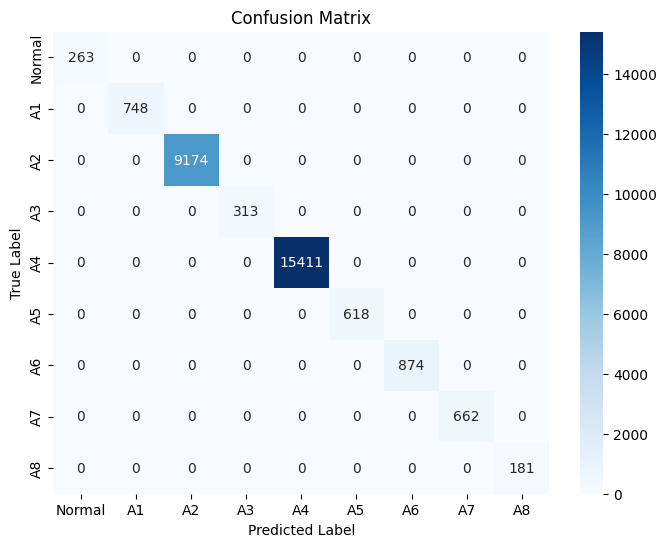

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 혼동 행렬 생성
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8"], yticklabels=["Normal", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

# One-vs-All AUC 계산
auc_score = roc_auc_score(y_test_onehot, y_pred_probs, multi_class='ovr')
print(f"다중 분류 AUC Score: {auc_score:.4f}")

다중 분류 AUC Score: 1.0000


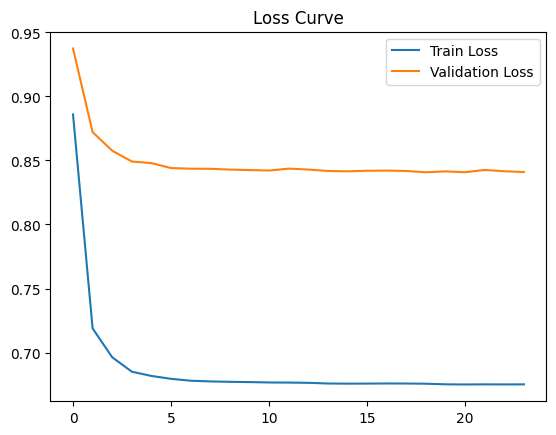

In [47]:
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

In [48]:
# y_test 없이 테스트 데이터만 사용하여 예측 수행
_, y_pred_probs = model.predict([X_test, np.zeros_like(y_test_onehot)])  # 더미 라벨 입력

# 최종 예측 클래스
y_pred_classes = np.argmax(y_pred_probs, axis=1)

883/883 [==============================] - 2s 2ms/step


In [49]:
# 다중 분류 예측 수행
x_decoded_pred, y_pred_probs = model.predict([X_test, y_test_onehot])

# 예측된 클래스 (가장 확률이 높은 클래스 선택)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 실제 정답 클래스
y_true_classes = np.argmax(y_test_onehot, axis=1)

# 정확도 평가
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"테스트 정확도: {accuracy * 100:.2f}%")

# 상세 성능 보고서 (Precision, Recall, F1-score)
print("\n분류 성능 보고서:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=["Normal", "Attack1", "Attack2", "Attack3", "Attack4", "Attack5", "Attack6", "Attack7", "Attack8"]))

883/883 [==============================] - 2s 2ms/step
테스트 정확도: 100.00%

분류 성능 보고서:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       263
     Attack1       1.00      1.00      1.00       748
     Attack2       1.00      1.00      1.00      9174
     Attack3       1.00      1.00      1.00       313
     Attack4       1.00      1.00      1.00     15411
     Attack5       1.00      1.00      1.00       618
     Attack6       1.00      1.00      1.00       874
     Attack7       1.00      1.00      1.00       662
     Attack8       1.00      1.00      1.00       181

    accuracy                           1.00     28244
   macro avg       1.00      1.00      1.00     28244
weighted avg       1.00      1.00      1.00     28244



In [50]:
from sklearn.metrics import roc_auc_score

# One-vs-All AUC 계산
auc_score = roc_auc_score(y_test_onehot, y_pred_probs, multi_class='ovr')
print(f"다중 분류 AUC Score: {auc_score:.4f}")

다중 분류 AUC Score: 1.0000


883/883 [==============================] - 2s 2ms/step
 테스트 정확도: 100.00%

 분류 성능 보고서:

                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00       263
            DDoS       1.00      1.00      1.00       748
   DoS GoldenEye       1.00      1.00      1.00      9174
        DoS Hulk       1.00      1.00      1.00       313
DoS Slowhttptest       1.00      1.00      1.00     15411
   DoS Slowloris       1.00      1.00      1.00       618
     FTP-Patator       1.00      1.00      1.00       874
        Portscan       1.00      1.00      1.00       662
     SSH-Patator       1.00      1.00      1.00       181

        accuracy                           1.00     28244
       macro avg       1.00      1.00      1.00     28244
    weighted avg       1.00      1.00      1.00     28244



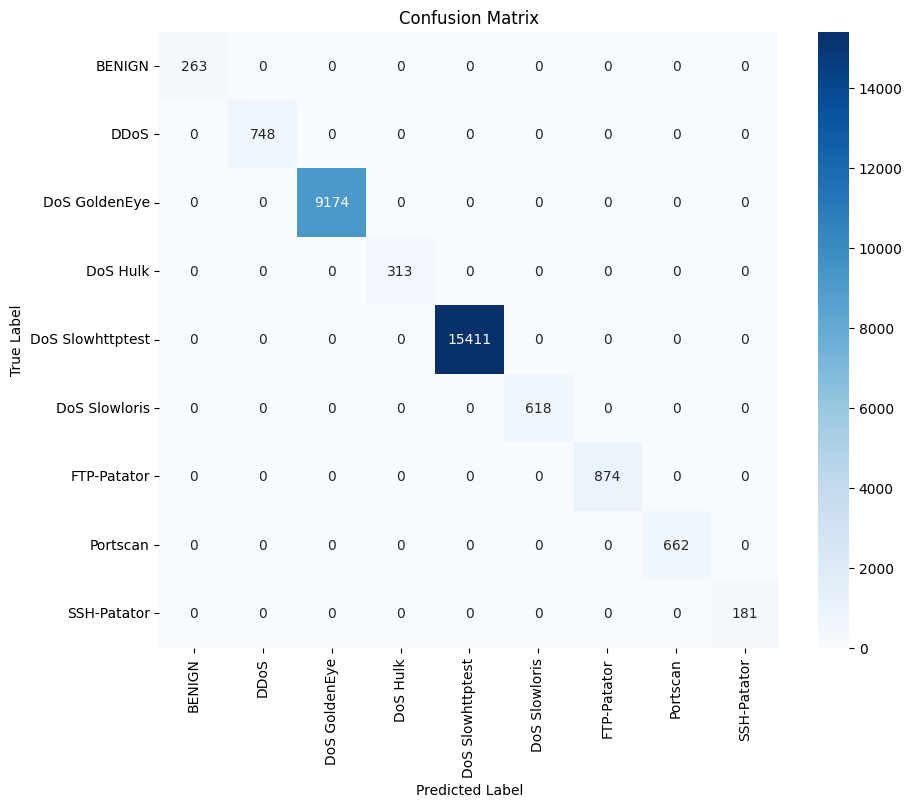

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 모델 예측
x_decoded_pred, y_pred_probs = model.predict([X_test, y_test_onehot])
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# 정확도 평가 및 상세 보고서 출력
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f" 테스트 정확도: {accuracy * 100:.2f}%\n")

target_names = ["BENIGN", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", 
                "DoS Slowloris", "FTP-Patator", "Portscan", "SSH-Patator"]

print(" 분류 성능 보고서:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Confusion Matrix 계산
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Confusion Matrix 시각화
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


883/883 [==============================] - 2s 2ms/step
 테스트 정확도: 100.00%

 분류 성능 보고서:

                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00       263
            DDoS       1.00      1.00      1.00       748
   DoS GoldenEye       1.00      1.00      1.00      9174
        DoS Hulk       1.00      1.00      1.00       313
DoS Slowhttptest       1.00      1.00      1.00     15411
   DoS Slowloris       1.00      1.00      1.00       618
     FTP-Patator       1.00      1.00      1.00       874
        Portscan       1.00      1.00      1.00       662
     SSH-Patator       1.00      1.00      1.00       181

        accuracy                           1.00     28244
       macro avg       1.00      1.00      1.00     28244
    weighted avg       1.00      1.00      1.00     28244



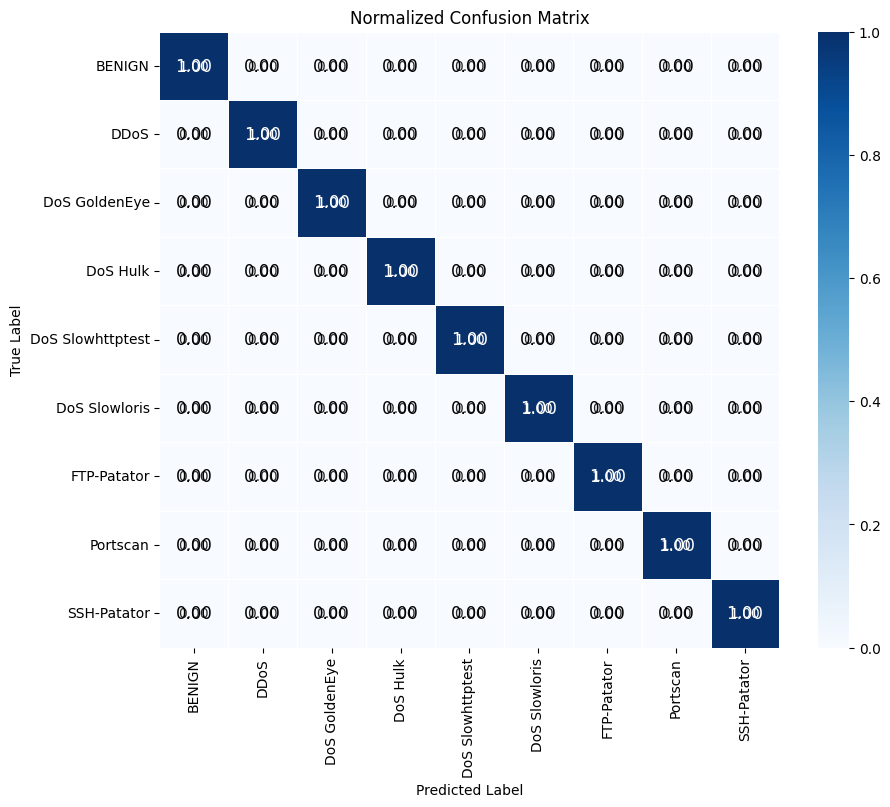

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 모델 예측
x_decoded_pred, y_pred_probs = model.predict([X_test, y_test_onehot])
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# 정확도 평가 및 상세 보고서 출력
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f" 테스트 정확도: {accuracy * 100:.2f}%\n")

target_names = ["BENIGN", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", 
                "DoS Slowloris", "FTP-Patator", "Portscan", "SSH-Patator"]

print(" 분류 성능 보고서:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Confusion Matrix 계산 (정규화 적용)
cm = confusion_matrix(y_true_classes, y_pred_classes, normalize='true')  # 행(row) 기준 정규화
cm = np.round(cm, 2)  # 소수점 2자리 반올림

# Confusion Matrix 시각화
plt.figure(figsize=(10,8))
ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, 
                 xticklabels=target_names, yticklabels=target_names)

# 강조 효과: 높은 값은 흰색, 낮은 값은 검은색으로 표시
for i in range(len(target_names)):
    for j in range(len(target_names)):
        value = cm[i, j]
        color = 'white' if value > 0.5 else 'black'  # 50% 이상이면 흰색
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color=color, fontsize=12)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()


883/883 [==============================] - 2s 2ms/step
테스트 정확도: 100.00%

분류 성능 보고서:

                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00       263
            DDoS       1.00      1.00      1.00       748
   DoS GoldenEye       1.00      1.00      1.00      9174
        DoS Hulk       1.00      1.00      1.00       313
DoS Slowhttptest       1.00      1.00      1.00     15411
   DoS Slowloris       1.00      1.00      1.00       618
     FTP-Patator       1.00      1.00      1.00       874
        Portscan       1.00      1.00      1.00       662
     SSH-Patator       1.00      1.00      1.00       181

        accuracy                           1.00     28244
       macro avg       1.00      1.00      1.00     28244
    weighted avg       1.00      1.00      1.00     28244



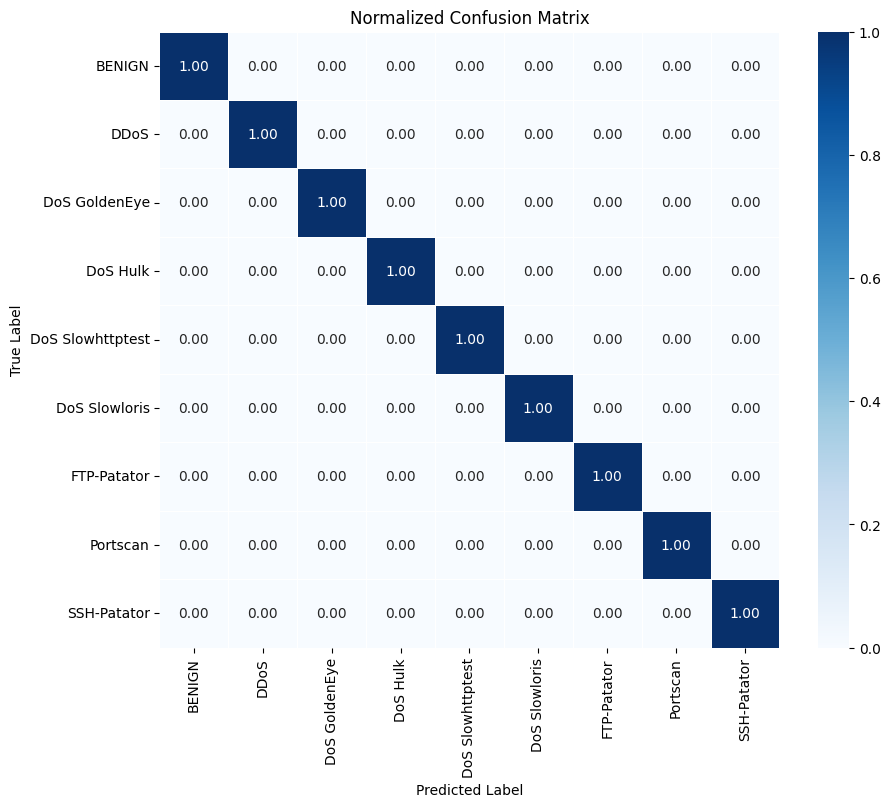

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 모델 예측
x_decoded_pred, y_pred_probs = model.predict([X_test, y_test_onehot])
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# 정확도 평가 및 상세 보고서 출력
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"테스트 정확도: {accuracy * 100:.2f}%\n")

target_names = ["BENIGN", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", 
                "DoS Slowloris", "FTP-Patator", "Portscan", "SSH-Patator"]

print("분류 성능 보고서:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Confusion Matrix 계산 (정규화 적용)
cm = confusion_matrix(y_true_classes, y_pred_classes, normalize='true')  # 행(row) 기준 정규화
cm = np.round(cm, 2)  # 소수점 2자리 반올림

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, 
            xticklabels=target_names, yticklabels=target_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()
